In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cmocean as cm
import IPython.display

In [2]:
import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cft.COLORS['land'])

In [3]:
file_01 = '/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6_newtopog/output437/ocean/ocean_snapshot.nc'
u_01  = xr.open_dataset(file_01).u.isel(time=0).isel(st_ocean=10)
v_01  = xr.open_dataset(file_01).v.isel(time=0).isel(st_ocean=10)
speed_01 = (u_01**2 + v_01**2)**0.5
speed_01.load()

<xarray.DataArray (yu_ocean: 2700, xu_ocean: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time      object 1939-10-01 00:00:00
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 ... 89.92 89.96 90.0
    st_ocean  float64 19.15

In [4]:
file_025 = '/home/157/amh157/cosima/access-om2-025/025deg_jra55v13_ryf9091_gmredi6/output119/ocean/ocean_snapshot.nc'
u_025  = xr.open_dataset(file_025).u.isel(time=0).isel(st_ocean=9)
v_025  = xr.open_dataset(file_025).v.isel(time=0).isel(st_ocean=9)
speed_025 = (u_025**2 + v_025**2)**0.5
speed_025.load()

<xarray.DataArray (yu_ocean: 1080, xu_ocean: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time      object 2138-02-01 00:00:00
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ... 79.5 79.75 80.0
  * yu_ocean  (yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.79 89.89 90.0
    st_ocean  float64 46.39

In [5]:
file_1='/home/157/amh157/cosima/access-om2/1deg_jra55v13_iaf_spinup1_B1_lastcycle/output059/ocean/ocean_snapshot.nc'
u_1  = xr.open_dataset(file_1).u.isel(time=0).isel(st_ocean=9)
v_1  = xr.open_dataset(file_1).v.isel(time=0).isel(st_ocean=9)
speed_1 = (u_1**2 + v_1**2)**0.5
speed_1.load()

<xarray.DataArray (yu_ocean: 300, xu_ocean: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time      object 2253-02-01 00:00:00
  * xu_ocean  (xu_ocean) float64 -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yu_ocean  (yu_ocean) float64 -77.75 -77.51 -77.26 -77.01 ... 89.1 89.55 90.0
    st_ocean  float64 46.39

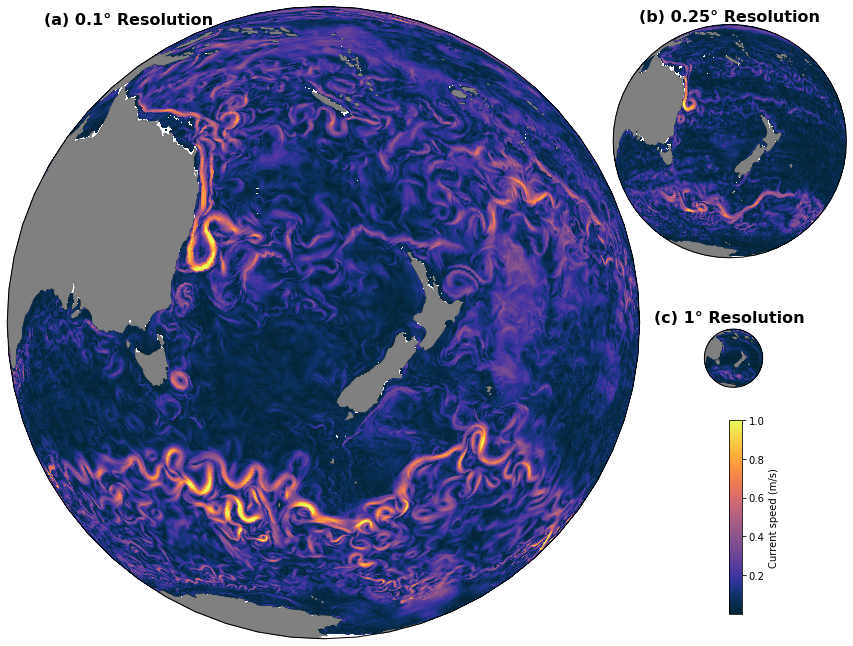

In [19]:
fig = plt.figure(figsize=(12,9))
ax_01 = plt.axes([0.01, 0, 0.732, 1.0],
                 projection=ccrs.NearsidePerspective(central_longitude=165.0, central_latitude=-40.0, satellite_height=2500000))#=35785831))      
ax_01.coastlines(resolution='50m')
ax_01.add_feature(land_50m,color='gray')
p1=ax_01.pcolormesh(u_01.xu_ocean,u_01.yu_ocean,speed_01,vmax=1,cmap=cm.cm.thermal,transform=ccrs.PlateCarree())
fig.text(0.15,0.96,'(a) 0.1° Resolution',ha='center',fontsize=16,fontweight='bold')

ax_025 = plt.axes([0.7, 0.6, 0.2927, 0.36],
                  projection=ccrs.NearsidePerspective(central_longitude=165.0, central_latitude=-40.0, satellite_height=2500000))#=35785831))      
ax_025.coastlines(resolution='50m')
ax_025.add_feature(land_50m,color='gray')
p1=ax_025.pcolormesh(u_025.xu_ocean,u_025.yu_ocean,speed_025,vmax=1,cmap=cm.cm.thermal,transform=ccrs.PlateCarree())
fig.text(0.8463,0.965,'(b) 0.25° Resolution',ha='center',fontsize=16,fontweight='bold')


ax_1 = plt.axes([0.81, 0.4, 0.0813, 0.09],
                projection=ccrs.NearsidePerspective(central_longitude=165.0, central_latitude=-40.0, satellite_height=2500000))#=35785831))      
ax_1.coastlines(resolution='50m')
ax_1.add_feature(land_50m,color='gray')
ax_1.pcolormesh(u_1.xu_ocean,u_1.yu_ocean,speed_1,vmax=1,cmap=cm.cm.thermal,transform=ccrs.PlateCarree())
fig.text(0.8463,0.5,'(c) 1° Resolution',ha='center',fontsize=16,fontweight='bold')

ax_cb = plt.axes([0.845, 0.05, 0.015, 0.3])
cb=plt.colorbar(p1,cax=ax_cb,orientation='vertical')
cb.ax.set_ylabel('Current speed (m/s)')

plt.savefig('temp.png')

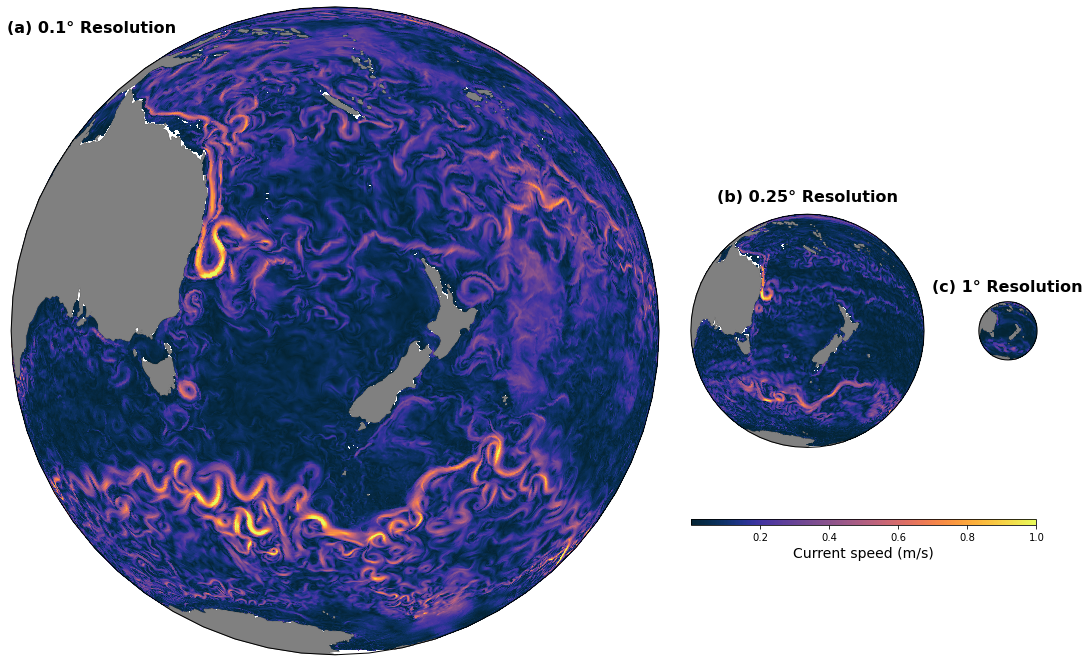

In [12]:
fig = plt.figure(figsize=(16,9))
ax_01 = plt.axes([0.01, 0, 0.5625, 1.0],
                 projection=ccrs.NearsidePerspective(central_longitude=165.0, central_latitude=-40.0, satellite_height=2500000))#=35785831))      
ax_01.coastlines(resolution='50m')
ax_01.add_feature(land_50m,color='gray')
p1=ax_01.pcolormesh(u_01.xu_ocean,u_01.yu_ocean,speed_01,vmax=1,cmap=cm.cm.thermal,transform=ccrs.PlateCarree())
fig.text(0.08,0.96,'(a) 0.1° Resolution',ha='center',fontsize=16,fontweight='bold')

ax_025 = plt.axes([0.6, 0.32, 0.2025, 0.36],
                  projection=ccrs.NearsidePerspective(central_longitude=165.0, central_latitude=-40.0, satellite_height=2500000))#=35785831))      
ax_025.coastlines(resolution='50m')
ax_025.add_feature(land_50m,color='gray')
p1=ax_025.pcolormesh(u_025.xu_ocean,u_025.yu_ocean,speed_025,vmax=1,cmap=cm.cm.thermal,transform=ccrs.PlateCarree())
fig.text(0.7012,0.7,'(b) 0.25° Resolution',ha='center',fontsize=16,fontweight='bold')


ax_1 = plt.axes([0.85, 0.455, 0.050625, 0.09],
                projection=ccrs.NearsidePerspective(central_longitude=165.0, central_latitude=-40.0, satellite_height=2500000))#=35785831))      
ax_1.coastlines(resolution='50m')
ax_1.add_feature(land_50m,color='gray')
ax_1.pcolormesh(u_1.xu_ocean,u_1.yu_ocean,speed_1,vmax=1,cmap=cm.cm.thermal,transform=ccrs.PlateCarree())
fig.text(0.875,0.56,'(c) 1° Resolution',ha='center',fontsize=16,fontweight='bold')

ax_cb = plt.axes([0.6, 0.2, 0.3, 0.01])
cb=plt.colorbar(p1,cax=ax_cb,orientation='horizontal')
cb.ax.set_xlabel('Current speed (m/s)',fontsize=14)

plt.savefig('temp.png')